In [15]:
#Backend People start here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import STL
from numpy import fft
import pylab as pl
from scipy.optimize import curve_fit

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-07-17,35.220720,35.712983,35.161554,35.395851,95174000,0.0,0.0
2017-07-18,35.310657,35.530759,35.185224,35.518925,71475200,0.0,0.0
2017-07-19,35.613581,35.836048,35.488148,35.741383,83692000,0.0,0.0
2017-07-20,35.854982,35.911783,35.544950,35.580448,68974800,0.0,0.0
2017-07-21,35.497618,35.604118,35.234918,35.563885,105010400,0.0,0.0


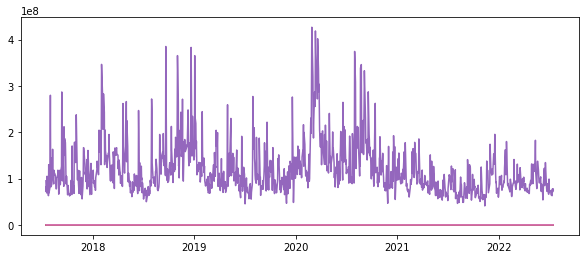

In [16]:
predictionValue = 1000
ticker = "AAPL"
years = 5
#if(ticker.info)
data = yf.Ticker(ticker).history(period=str(years) +'y')
try:
    data.iloc[1]
except:
    v = False
    print(v)
    
plt.figure(figsize=(10,4))
plt.plot(data)

data.head()

In [17]:
hiLowAvg = data
hiLowAvg['Average Price'] = (hiLowAvg['High'] + hiLowAvg['Low'])/2
hiLowAvg = hiLowAvg.drop(columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Dividends', 'Stock Splits'])

hiLowAvg.head()

,Average Price
Date,
2017-07-17,35.437269
2017-07-18,35.357991
2017-07-19,35.662098
2017-07-20,35.728367
2017-07-21,35.419518


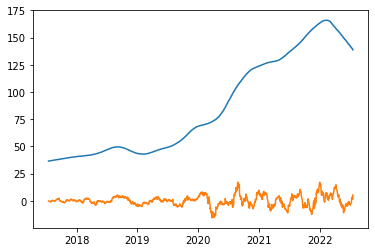

In [18]:
stl = STL(hiLowAvg, period = 100)
result = stl.fit()

trend, seasonal, residual = result.trend, result.seasonal, result.resid

plt.plot(trend)
plt.plot(residual)

In [19]:
print(trend)

Date
2017-07-17     36.461681
2017-07-18     36.498172
2017-07-19     36.534645
2017-07-20     36.571098
2017-07-21     36.607533
                 ...    
2022-07-11    139.953198
2022-07-12    139.645189
2022-07-13    139.336673
2022-07-14    139.027666
2022-07-15    138.718181
Name: trend, Length: 1259, dtype: float64


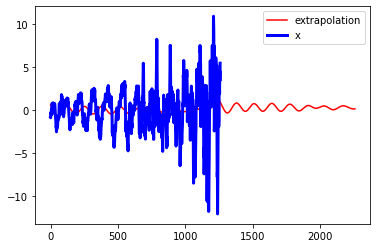

[0.60461905 0.57713818 0.54892426 ... 0.15078909 0.15276476 0.15499955]


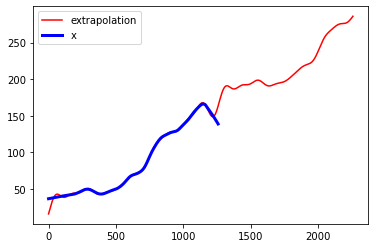

[ 15.69347312  16.34666156  17.00450079 ... 285.45600588 285.70683798
 285.95756119]
<class 'numpy.ndarray'>


In [20]:
from numpy import fft
import pylab as pl

def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))    
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


extrapolation = fourierExtrapolation(seasonal, predictionValue)

pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, seasonal.size), seasonal, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()

print(extrapolation)

seasonalexpo=extrapolation

extrapolation = fourierExtrapolation(trend, predictionValue)

pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, trend.size), trend, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()

print(extrapolation)

trendexpo=extrapolation
print(type(trendexpo))

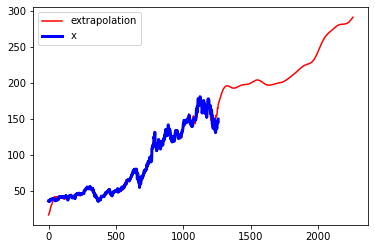

Date
2017-07-17     35.437269
2017-07-18     35.357991
2017-07-19     35.662098
2017-07-20     35.728367
2017-07-21     35.419518
                 ...    
2022-07-11    145.209999
2022-07-12    146.750000
2022-07-13    144.284996
2022-07-14    146.099998
2022-07-15    149.529999
Length: 1259, dtype: float64


In [21]:
trend, seasonal, residual = result.trend, result.seasonal, result.resid

residual = residual.to_numpy()
residual = list(residual)

for i in range(predictionValue):
    residual.append(residual[-1])
    
residual = np.asarray(residual)
expo=trendexpo+seasonalexpo+residual
actual = trend+seasonal+residual[0:residual.size-predictionValue]
pl.plot(np.arange(0, expo.size), expo, 'r', label = 'extrapolation')
pl.plot(np.arange(0, actual.size), actual, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()

print(actual)

In [22]:
#Percentage Increase
print(extrapolation)

[ 15.69347312  16.34666156  17.00450079 ... 285.45600588 285.70683798
 285.95756119]
